<a href="https://colab.research.google.com/github/pradeeppatwa/NLP_Sentiment-Analysis-and-Classification-using-IMDB-Dataset-and-LSTM/blob/main/LSTM_IMBD_Sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies :

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize    #sentence is splited into single words
from keras.preprocessing.text import Tokenizer  #words to numeric values
from keras.preprocessing.sequence import pad_sequences  #pad extra values to make equal length
from keras.models import Sequential  
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Importing Data :

In [38]:
data = open("IMDB Dataset.csv")
imbd = pd.read_csv(data)
imbd.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Distribution of target variable : 

In [39]:
imbd.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Factoring sentences into words :

In [40]:
text = imbd['review'][0]
print(text)
print("<================>")
print(word_tokenize(text))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [41]:
corpus = []
for text in imbd['review']:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [42]:
num_words = len(corpus)
print(num_words)

50000


Spiltting data to train(80%) and test(20%) :

In [43]:
imbd.shape

(50000, 2)

In [44]:
train_size = int(imbd.shape[0] *0.8)
X_train = imbd.review[:train_size]
y_train = imbd.sentiment[:train_size]

X_test = imbd.review[train_size:]
y_test = imbd.sentiment[train_size:]

Tokenizing the words and padding for equal input dimensions :

In [45]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = 128, truncating = 'post', padding='post')

In [46]:
X_train[0], len(X_train[0])

(array([   27,     4,     1,    80,  2102,    45,  1073,    12,   100,
          147,    39,   316,  2968,   409,   459,    26,  3173,    33,
           23,   200,    14,    11,     6,   614,    48,   606,    16,
           68,     7,     7,     1,    87,   148,    12,  3256,    68,
           41,  2968,    13,    92,  5626,     2, 16202,   134,     4,
          569,    60,   271,     8,   200,    36,     1,   673,   139,
         1712,    68,    11,     6,    21,     3,   118,    15,     1,
         7870,  2257,    38, 11540,    11,   118,  2495,    54,  5662,
           16,  5182,     5,  1438,   377,    38,   569,    92,     6,
         3730,     8,     1,   360,   353,     4,     1,   673,     7,
            7,     9,     6,   431,  2968,    14,    12,     6,     1,
        11736,   356,     5,     1, 14689,  6526,  2594,  1087,     9,
         2661,  1432,    20, 22583,   534,    32,  4795,  2451,     4,
            1,  1193,   117,    29,     1,  6893,    25,  2874, 12191,
      

In [47]:
from nltk.util import pad_sequence
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen= 128, truncating= 'post', padding = 'post')                                     

In [48]:
X_test[0], len(X_test[0])

(array([   87,   122,    10,   180,     5,   132,    12,    10,  7131,
         3717,    20,     1,  1001,  2285,     2,    10,   255,     1,
           17,  2431,    10,  1311,     5,   103,     1,   222,  6349,
            4,     3,    19,    11,    17,   974,     3,   351,     5,
          215,  1011,   415,     9,    13,   215,  1380,    56,   235,
          402,   300,     4,   316,    23,   257,    19,   961,    12,
        22250,    12,    33,    66,    61,   212,    53,    16,    11,
          113,    13,   497,     2,     1,   102,    70,  5358,    15,
            1,    88,   172,     1,   473,   824,     8,     1,    64,
           67,    54,    49,  2406,    30,    29,    33,    90,    40,
        35787,    83,    46,   438,     4,     3,    74,   220,     2,
           10,   115,    21,    63,    12,    30,    29,   268,    10,
         1059,   137,    10,    78,    21,   119,    28,    13,     1,
           88,   175,     5,   728,  3423,   108,     8,     1,    17,
      

In [49]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 128) (40000,)
(10000, 128) (10000,)


In [50]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Creating a Base Model :

In [51]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 100,
                    input_length = 128, trainable= True))
model.add(LSTM(100, dropout= 0.1, return_sequences= True))
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 100)          5000000   
                                                                 
 lstm_2 (LSTM)               (None, 128, 100)          80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,160,901
Trainable params: 5,160,901
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
625/625 [==============================] - 236s 378ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.4749 - val_accuracy: 0.8441
Epoch 2/20
625/625 [==============================] - 234s 375ms/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.6950 - val_accuracy: 0.8491
Epoch 3/20
625/625 [==============================] - 233s 373ms/step - loss: 0.0332 - accuracy: 0.9903 - val_loss: 0.6702 - val_accuracy: 0.8395
Epoch 4/20
625/625 [==============================] - 233s 373ms/step - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.6751 - val_accuracy: 0.8373
Epoch 5/20
625/625 [==============================] - 232s 372ms/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.8053 - val_accuracy: 0.8472
Epoch 6/20
625/625 [==============================] - 234s 375ms/step - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.7980 - val_accuracy: 0.8353
Epoch 7/20
625/625 [==============================] - 233s 373ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.8341 -

Loss figure :

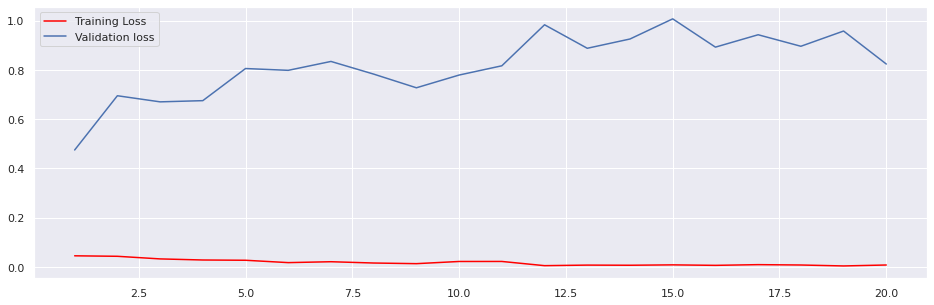

In [56]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.legend()
plt.show()

Accuracy figure :

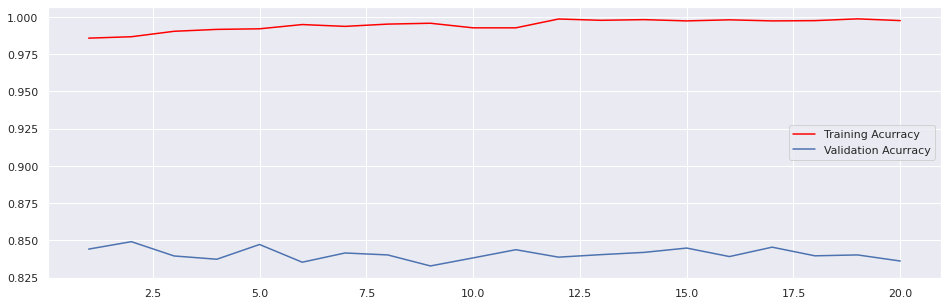

In [57]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Acurracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Acurracy')
plt.legend()
plt.show()

Validation test :

Test 1:

In [59]:
validation_sentence = ['It had some bad parts like the storyline although the actors performed really well and that is why overall I enjoyed it.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, 
                                           truncating= 'post', padding='post')
print(validation_sentence[0])
print('Probability of Positive: {}'.format(model.predict(validation_sentence_padded)[0]))

It had some bad parts like the storyline although the actors performed really well and that is why overall I enjoyed it.
Probability of Positive: [0.998716]


Test 2 :

In [63]:
validation_sentence = ['this movie is very bad']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, 
                                           truncating= 'post', padding='post')
print(validation_sentence[0])
print('Probability of Positive: {}'.format(model.predict(validation_sentence_padded)[0]))

this movie is very bad
Probability of Positive: [0.01574647]


Test 3 :

In [64]:
validation_sentence = ['I can watch this movie forever just because of the beauty in its cinematography.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, 
                                           truncating= 'post', padding='post')
print(validation_sentence[0])
print('Probability of Positive: {}'.format(model.predict(validation_sentence_padded)[0]))

I can watch this movie forever just because of the beauty in its cinematography.
Probability of Positive: [0.9793362]


Test 4 :

In [65]:
validation_sentence = ['this is the worst movie ']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, 
                                           truncating= 'post', padding='post')
print(validation_sentence[0])
print('Probability of Positive: {}'.format(model.predict(validation_sentence_padded)[0]))

this is the worst movie 
Probability of Positive: [0.00626335]
